In [1]:
include("biblioteca.jl")
using PyPlot

In [2]:
function  ϕ_matrix(ψj,Q,M)
    ϕ = zeros(Q,M)
    ξ = zglj(Q)
    for i in 1:M
        for j in 1:Q
            ϕ[j,i] = ψj(i,ξ[j],M)
        end
    end
  return ϕ
end

ϕ_matrix (generic function with 1 method)

In [3]:
function Mass_matrix(ϕ,w,M,Q)
    L = zeros(M,M)
    for i in 1:M
        for j in 1:M
           m= 0.0
            for q in 1:Q
                m = m + ϕ[q,i]*ϕ[q,j]*w[q]
            end
            L[i,j] = m
        end
    end
    return L
end

Mass_matrix (generic function with 2 methods)

In [4]:
function ψj(p,E,Q)
    if(p == 1)
     return  (1-E)/2
        elseif(p == 2)
     return  (1+E)/2
    else
     return  (1-E)*(1+E)/4 .* jacobi(E, p-3, 1, 1)
    end
end 


ψj (generic function with 1 method)

In [5]:
function fr_vector(fun,M,Q)
    fr = zeros(M)
    ξ = zglj(Q)
    for i in 1:M
        temp = 0.0
        for q in 1:Q
            temp = temp + fun(ξ[q])*ϕ[q,i]*w[q]
        end
        fr[i]= temp
    end
    return fr
end

fr_vector (generic function with 1 method)

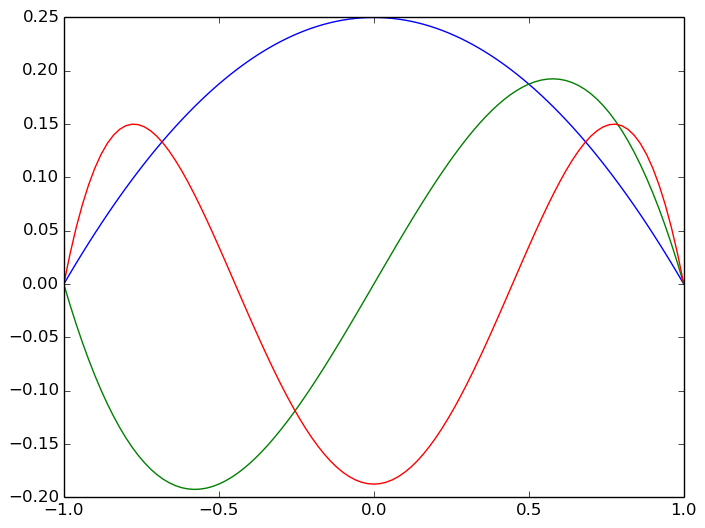

In [6]:

xx = [linspace(-1,1,101);]
for i in 3:5
    plot(xx,[ψj(i,x,4) for x in xx])
end

In [12]:
#######################
fun(x) = sin(x*2*pi)
#fun(x) = -x.^2 -2.*x + 5
#######################
Q = 10
I = 10
ξ = zglj(Q)
w = wglj(ξ,0.,0.)
ϕ = ϕ_matrix(ψj,Q,I)
M = Mass_matrix(ϕ,w,I,Q)

M2 = ϕ'*diagm(w)*ϕ
M-M2
M2
ϕ

10x10 Array{Float64,2}:
 1.0       0.0       0.0        …  -0.0          0.0        -0.0      
 0.959767  0.040233  0.0386143     -0.0859315    0.0616133  -0.0315317
 0.869387  0.130613  0.113553       0.0971107   -0.112075    0.0713903
 0.738962  0.261038  0.192897       0.00903601   0.10808    -0.106421 
 0.582639  0.417361  0.243171      -0.126756    -0.0444918   0.126679 
 0.417361  0.582639  0.243171   …   0.126756    -0.0444918  -0.126679 
 0.261038  0.738962  0.192897      -0.00903601   0.10808     0.106421 
 0.130613  0.869387  0.113553      -0.0971107   -0.112075   -0.0713903
 0.040233  0.959767  0.0386143      0.0859315    0.0616133   0.0315317
 0.0       1.0       0.0            0.0          0.0         0.0      

In [13]:
fr_vector(fun,10,10)

10-element Array{Float64,1}:
  0.159155   
 -0.159155   
 -4.33681e-19
 -0.024186   
  3.46945e-18
 -0.118414   
  8.67362e-19
  0.10329    
 -4.33681e-18
 -0.0349498  

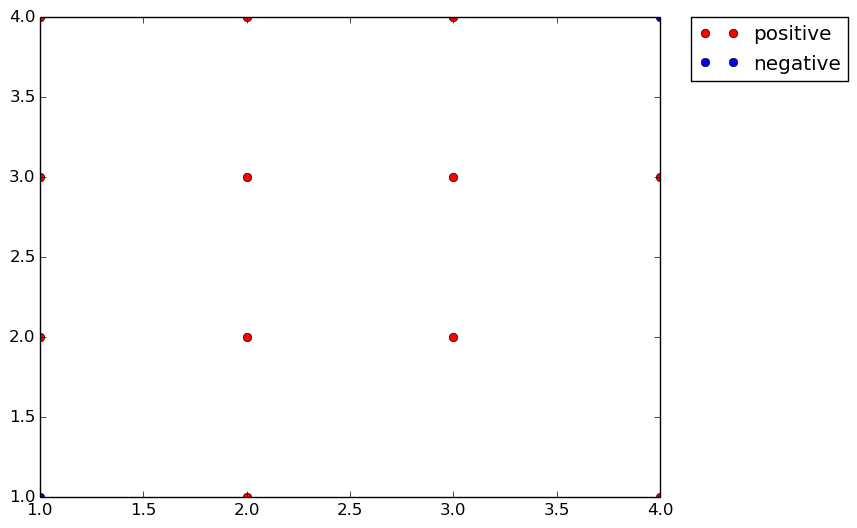

In [8]:
plot_matrix(M)

In [9]:


fr= fr_vector(fun,I,Q)
#M^-1 * fr  

4-element Array{Float64,1}:
 -0.121351 
  0.121351 
  0.0      
  0.0970809

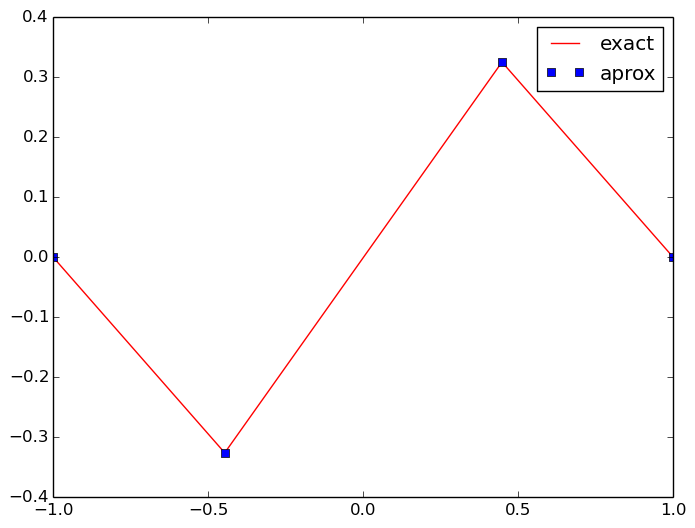

4-element Array{Float64,1}:
 -1.0     
 -0.447214
  0.447214
  1.0     

In [10]:
uh = M\fr #solver_beta(M,fr,0)
uq = ϕ*uh
ue = fun(ξ)
plot(ξ,ue,label ="exact","red")
plot(ξ,uq,label ="aprox","bs")
legend()
maximum(ue-uq)
ξ

# Edo, Dirichlet u(-1) = 0 e u(1) = 0

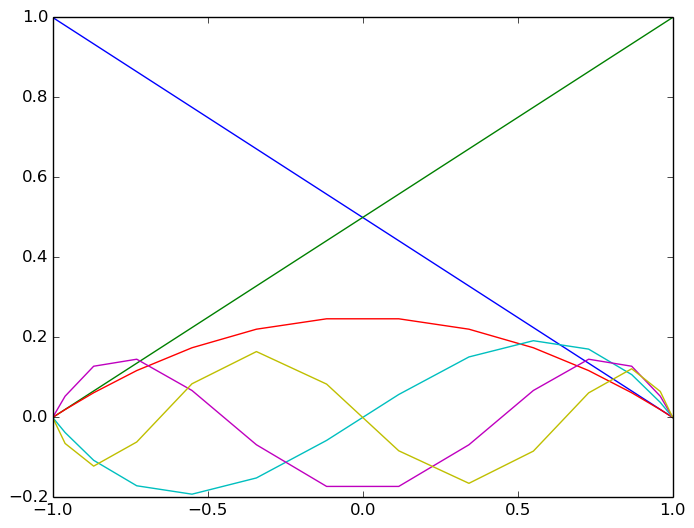

In [11]:
#######################
fun(x) = sin(x*2*pi)
#fun(x) = -x.^2 -2.*x + 5
#######################
Q = 14
I = 6
ξ = zglj(Q)
w = wglj(ξ,0.,0.)
ϕ = ϕ_matrix(ψj,Q,I)
M = Mass_matrix(ϕ,w,I,Q)
for i in 1:I
    plot(ξ,ϕ[:,i])
end